In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d buraktaci/multiple-sclerosis

Dataset URL: https://www.kaggle.com/datasets/buraktaci/multiple-sclerosis
License(s): unknown
100% 629M/630M [00:21<00:00, 24.9MB/s]
100% 630M/630M [00:21<00:00, 30.6MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/multiple-sclerosis.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline


In [ ]:
trainpath='/kaggle/input/intel-image-classification/seg_train'

In [ ]:
import os
import glob as gb

# Specify the base directory path
base_path = '/kaggle/input/multiple-sclerosis'

# Construct the full path to the 'seg_train' directory
train_path = os.path.join(base_path, '/content/Multiple Sclerosis')

# Get the list of folders in the 'seg_train' directory
folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)

    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))

    # Print the number of files found in the current folder
    print(f"For training data, found {len(files)} in folder {folder}")


For training data, found 650 in folder MS-Axial
For training data, found 1002 in folder Control-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 761 in folder MS-Sagittal


In [ ]:
import pandas as pd

size = []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(719, 1493, 4)       2
(618, 758, 4)        2
(543, 487, 4)        1
(515, 450, 4)        1
(606, 722, 4)        1
(687, 912, 4)        1
Name: count, dtype: int64

In [ ]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [ ]:
import cv2

In [ ]:
s = 150

In [ ]:
x_train= []
y_train= []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])

In [ ]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


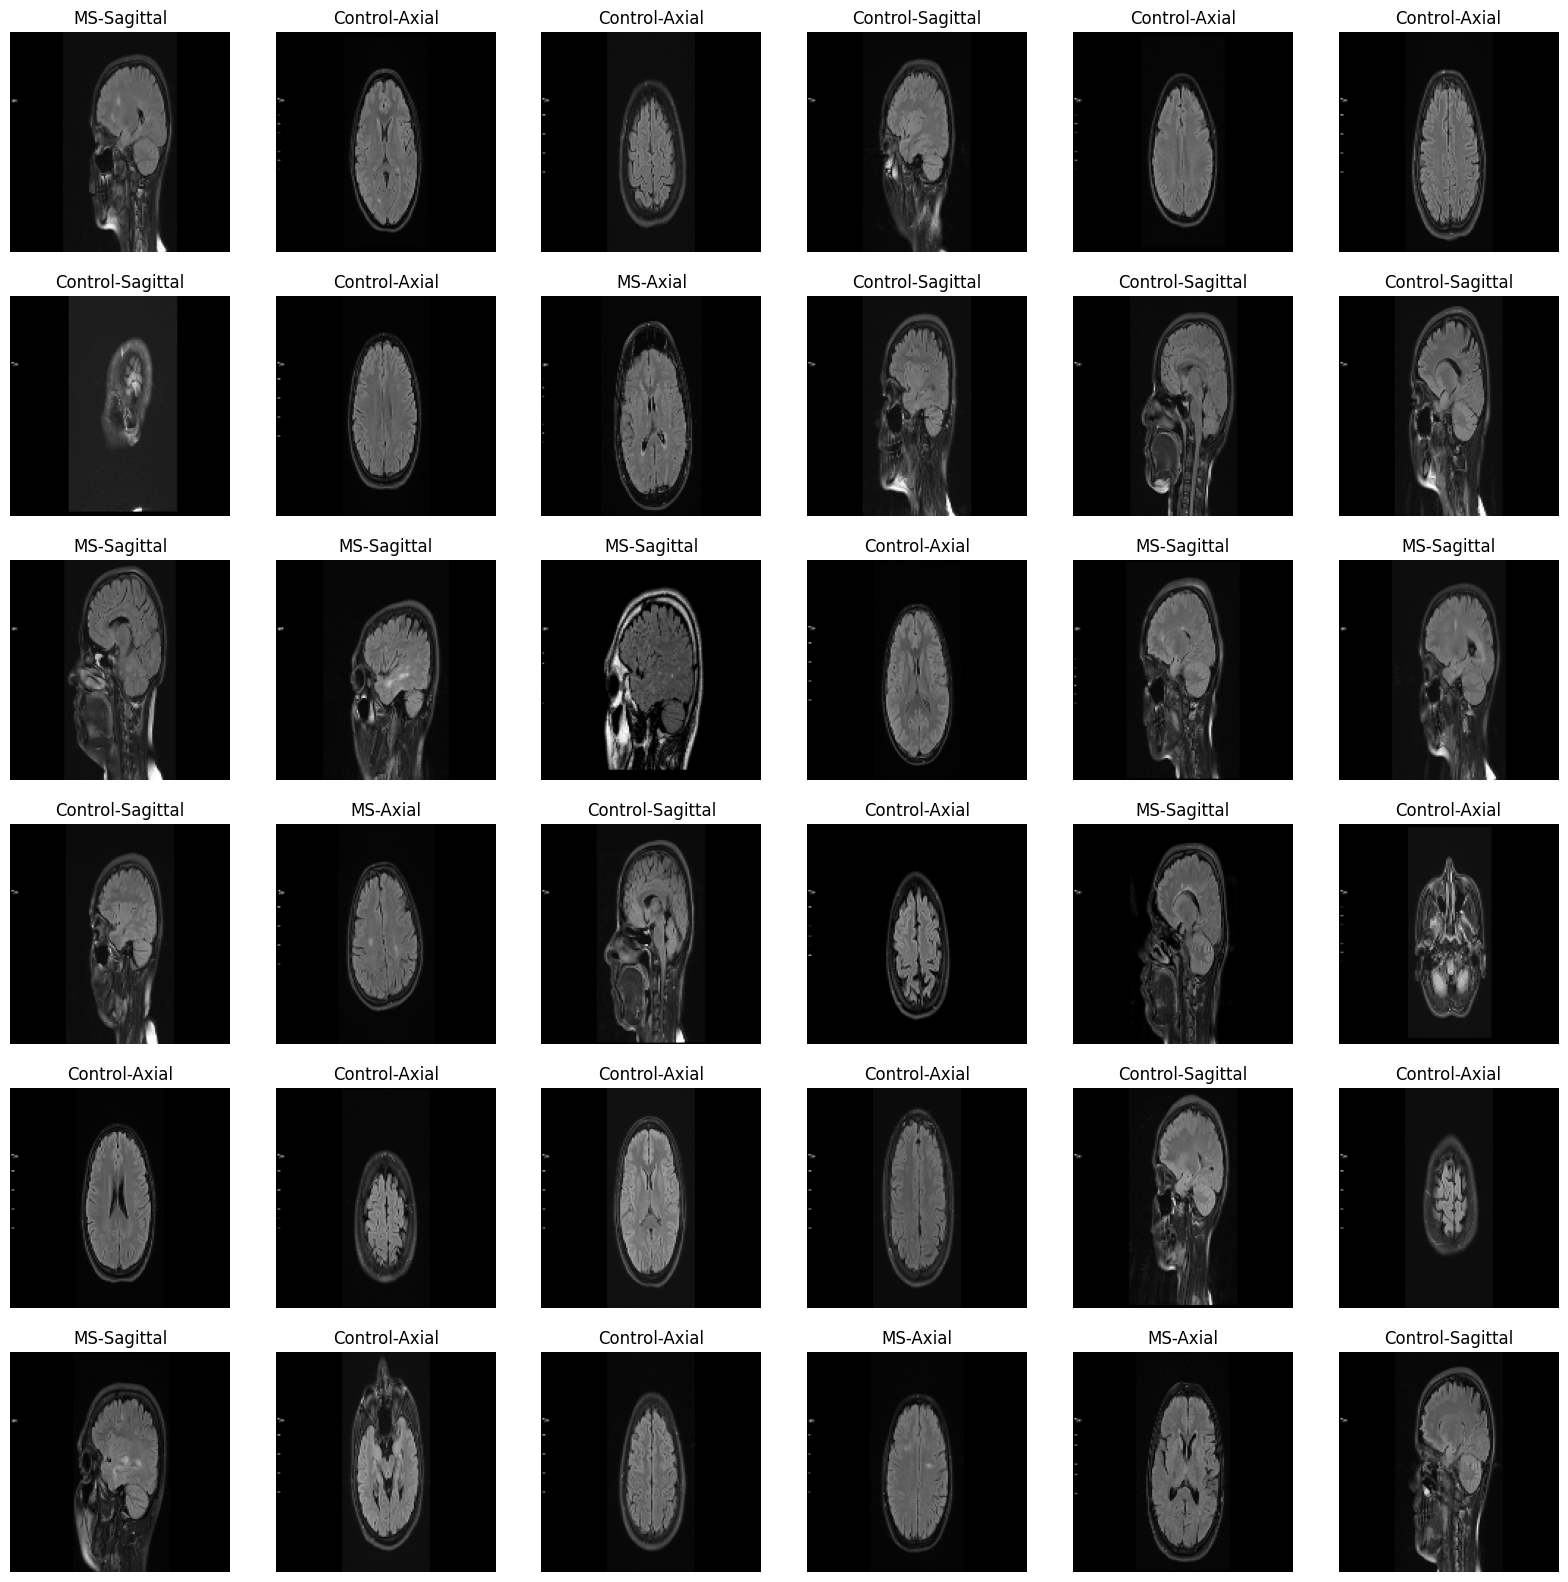

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 150, 150, 3)
y_train shape is (3427,)


In [ ]:
from keras.layers import MaxPooling2D,Dropout

Epoch 1/30
86/86 [==============================] - 13s 44ms/step - loss: 0.7152 - accuracy: 0.6822 - val_loss: 0.4350 - val_accuracy: 0.8105
Epoch 2/30
86/86 [==============================] - 2s 25ms/step - loss: 0.4045 - accuracy: 0.8278 - val_loss: 0.3407 - val_accuracy: 0.8717
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.3204 - accuracy: 0.8730 - val_loss: 0.2589 - val_accuracy: 0.9009
Epoch 4/30
86/86 [==============================] - 2s 26ms/step - loss: 0.2595 - accuracy: 0.8975 - val_loss: 0.2250 - val_accuracy: 0.9155
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.2092 - accuracy: 0.9212 - val_loss: 0.2172 - val_accuracy: 0.9329
Epoch 6/30
86/86 [==============================] - 2s 25ms/step - loss: 0.1681 - accuracy: 0.9380 - val_loss: 0.2122 - val_accuracy: 0.9359
Epoch 7/30
86/86 [==============================] - 2s 25ms/step - loss: 0.1511 - accuracy: 0.9427 - val_loss: 0.1560 - val_accuracy: 0.9475
Epoch 8/30
8

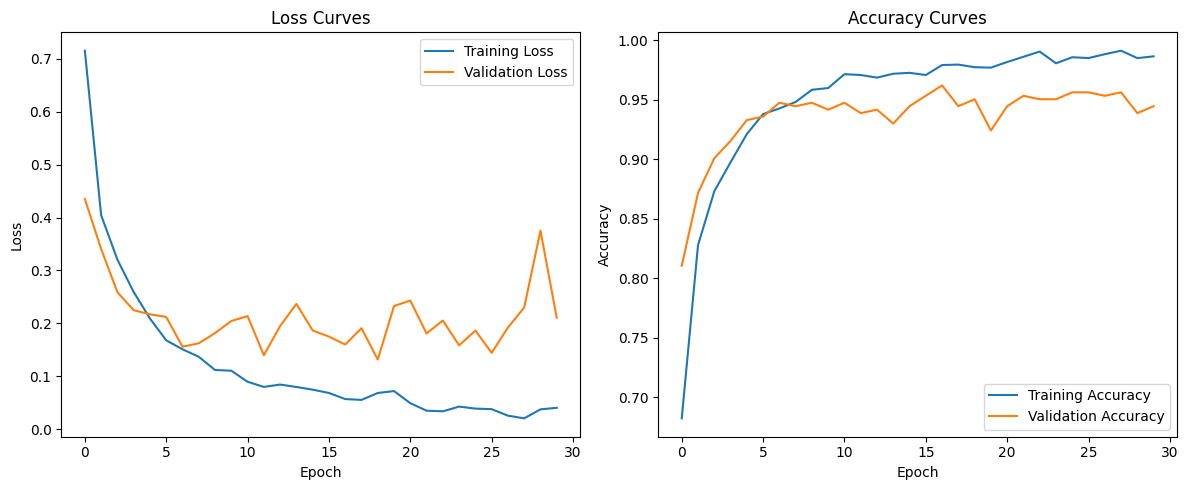

In [ ]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Split the data into training and validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Number of classes
num_classes = 4  # Change this to the number of classes in your dataset

# Step 2: Architecture Design
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

# Step 5: Training
history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)

# Print test accuracy

print("Test accuracy:", test_accuracy)

11/11 [==============================] - 0s 11ms/step - loss: 0.2696 - accuracy: 0.9592
Test accuracy: 0.9591836929321289


11/11 [==============================] - 0s 10ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.93      1.00      0.96        95
     Class 1       0.95      0.98      0.97       106
     Class 2       1.00      0.91      0.95        74
     Class 3       0.97      0.93      0.95        68

    accuracy                           0.96       343
   macro avg       0.96      0.95      0.96       343
weighted avg       0.96      0.96      0.96       343

Weighted Precision: 0.9607
Weighted Recall: 0.9592
Weighted F1-score: 0.9590


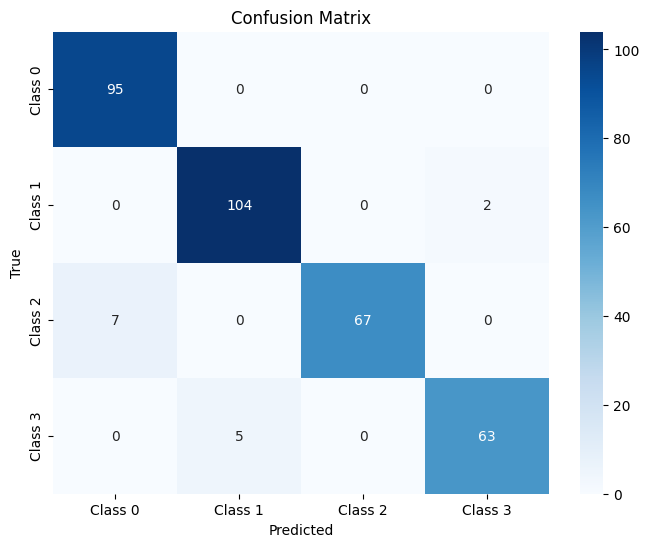

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Assuming you have already trained and evaluated your model, and you have true_labels
true_labels = y_test  # True labels from your test set

# Predict probabilities using the model
predicted_probabilities = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate and print classification report
report = classification_report(true_labels, predicted_labels, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:\n", report)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)],
            yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save("cnn_task3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('cnn_task3.h5')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from keras import backend as K

from tensorflow.python.framework import ops


In [ ]:
model = load_model('cnn_task3.h5')

In [ ]:
img_size = (150, 150)
mapping = {0:'Control-Axial', 1:'Control-Sagittal', 2:'MS-Axial', 3:'MS-Sagittal'}

last_conv_layer_name = "conv2d_2"
img_path="/content/th (3).jpg"

In [ ]:
def load_image(path, preprocess=True):
    img_temp = cv2.imread(path)
    img_temp = cv2.resize(img_temp, img_size)
    img_temp = img_temp.astype('float32') / 255.0
    if preprocess:
        img_temp= np.array(img_temp)
        img_temp = np.expand_dims(img_temp, axis=0)
    return img_temp

def deprocess_image(x):
    x = x.copy()
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255 #to convert into RGB
    if K.common.image_dim_ordering() == 'th': #to convert type 'th' to type 'tf'
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
"""Function returning modified model.
Changes gradient function for all ReLu activations
according to Guided Backpropagation.
"""
def build_guided_model():
    if "GuidedBackProp" not in ops._gradient_registry._registry: #avoid over-write
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf1.cast(grad > 0., dtype) * \
                   tf1.cast(op.inputs[0] > 0., dtype)

    g = tf1.get_default_graph()       #guidedbackdrop in another copy
    with g.gradient_override_map({'Relu': 'GuidedBackProp'}):
        new_model = load_model('cnn_task3.h5')
    return new_model

#Guided Backpropagation method
def guided_backprop(input_model, images, layer_name):
    input_imgs = input_model.input
    layer_output = input_model.get_layer(layer_name).output
    grads = K.gradients(layer_output, input_imgs)[0]
    backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
    grads_val = backprop_fn([images, 0])[0]
    return grads_val

In [ ]:
"""Function returning modified model.
Changes gradient function for all ReLu activations
according to Guided Backpropagation.
"""
def build_guided_model():
    if "GuidedBackProp" not in ops._gradient_registry._registry: #avoid over-write
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf1.cast(grad > 0., dtype) * \
                   tf1.cast(op.inputs[0] > 0., dtype)

    g = tf1.get_default_graph()       #guidedbackdrop in another copy
    with g.gradient_override_map({'Relu': 'GuidedBackProp'}):
        new_model = load_model('cnn_task3.h5')
    return new_model

#Guided Backpropagation method
def guided_backprop(input_model, images, layer_name):
    input_imgs = input_model.input
    layer_output = input_model.get_layer(layer_name).output
    grads = K.gradients(layer_output, input_imgs)[0]
    backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
    grads_val = backprop_fn([images, 0])[0]
    return grads_val

In [ ]:
import tensorflow as tf

def grad_cam(input_model, image, cls, layer_name):
    image_tensor = tf.convert_to_tensor(image)  # Convert image to TensorFlow tensor
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        y_c = input_model.output[0, cls]
        conv_output = input_model.get_layer(layer_name).output

    grads = tape.gradient(y_c, tf.convert_to_tensor(image))[0]
    grads_val = grads[0]

    grads_val = grads_val / np.max(np.abs(grads_val))

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, dsize=(img_size[1], img_size[0]), interpolation=cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()

    return cam

In [ ]:
import tensorflow as tf
import numpy as np

def grad_cam(input_model, image, cls, layer_name):
    with tf.GradientTape() as tape:
        tape.watch(image)
        y_c = input_model.output[0, cls]
        conv_output = input_model.get_layer(layer_name).output
        grads = tape.gradient(y_c, tf.convert_to_tensor(image))[0]
    gradient_function = tf.keras.backend.function([input_model.input], [conv_output, grads])
    output, grads_val = gradient_function([image])
    # Rest of the code...

In [ ]:

import tensorflow.compat.v1 as tf1
guided_model = build_guided_model()

In [ ]:
def load_image(path, preprocess=True):
    img_temp = cv2.imread(path)
    if img_temp is None:
        raise ValueError("Image could not be read at path: {}".format(path))
    img_temp = cv2.resize(img_temp, img_size)
    img_temp = img_temp.astype('float32') / 255.0
    if preprocess:
        # Perform any additional preprocessing steps here
        pass
    return img_temp

In [ ]:
guided_model = build_guided_model()

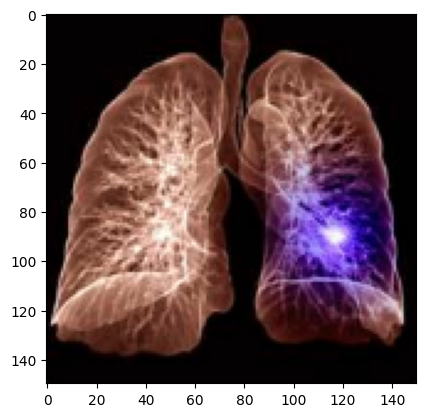

In [ ]:
plt.imshow(load_image(img_path, preprocess=False))

In [ ]:
def guided_gradcam_fn(model, guided_model, img_path, layer_name, cls=-1, visualize=True, save=True):
    # Perform GradCAM and Guided GradCAM operations here
    # ...
    return gradcam, gb, guided_gradcam